In [1]:
# This file is modified version of original:
# https://github.com/TheoViel/kaggle_benetech/blob/cleaning/notebooks/Preparation.ipynb

**About** : this notebook is used to prepare the data.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# cd

In [4]:
# cd ./src/

In [5]:
# cd

## Initialization

### Imports

In [6]:
import os
import sys
import cv2
import glob
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

pd.set_option('display.width', 500)
pd.set_option('max_colwidth', 100)

## Processing

In [7]:
def get_annotations(annotations_path: str = "./input/train/annotations") -> pd.DataFrame:
    """
    Loads and returns a pandas DataFrame containing all annotations found at the given path.

    Args:
        annotations_path (str): Path to the directory containing the annotations.
        
    Returns:
        pd.DataFrame: A pandas DataFrame containing the annotations.
    """
    annotations = []
    for annotation_path in tqdm(os.listdir(annotations_path)):
        with open(f"{annotations_path}/{annotation_path}") as annotation_f:
            annots = json.load(annotation_f)
            
            # annotation_path => 8941f843bb04.json
            annots['id'] = annotation_path[:-5]
            annotations.append(annots)

            
    df = pd.DataFrame(annotations)
    df = df[['id', 'source', 'chart-type', 'plot-bb', 'text', 'axes', 'data-series', 'visual-elements']]
    return df

In [8]:
df = get_annotations()

100%|███████████████████████████████████| 60578/60578 [00:09<00:00, 6594.16it/s]


In [9]:
df.head(5)

,id,source,chart-type,plot-bb,text,axes,data-series,visual-elements
0,8941f843bb04,generated,dot,"{'height': 210, 'width': 413, 'x0': 77, 'y0': 34}","[{'id': 0, 'polygon': {'x0': 100, 'x1': 381, 'x2': 381, 'x3': 100, 'y0': 7, 'y1': 7, 'y2': 21, '...","{'x-axis': {'ticks': [{'id': 14, 'tick_pt': {'x': 111, 'y': 244}}, {'id': 15, 'tick_pt': {'x': 1...","[{'x': '1-10', 'y': 4}, {'x': '11-20', 'y': 9}, {'x': '21-30', 'y': 3}, {'x': '31-40', 'y': 6}, ...","{'bars': [], 'boxplots': [], 'dot points': [[{'x': 111.16666666666667, 'y': 231.69999999999996},..."
1,7dbdb91fa4a7,generated,scatter,"{'height': 198, 'width': 387, 'x0': 53, 'y0': 49}","[{'id': 0, 'polygon': {'x0': 49, 'x1': 415, 'x2': 415, 'x3': 49, 'y0': 5, 'y1': 5, 'y2': 35, 'y3...","{'x-axis': {'ticks': [{'id': 13, 'tick_pt': {'x': 53, 'y': 247}}, {'id': 14, 'tick_pt': {'x': 10...","[{'x': 1989.8843519834604, 'y': 137.384032977202}, {'x': 1991.9345738036784, 'y': 137.4446033481...","{'bars': [], 'boxplots': [], 'dot points': [], 'lines': [], 'scatter points': [[{'x': 106.666666..."
2,956c946a123d,generated,line,"{'height': 183, 'width': 402, 'x0': 62, 'y0': 43}","[{'id': 0, 'polygon': {'x0': 89, 'x1': 446, 'x2': 446, 'x3': 89, 'y0': 11, 'y1': 11, 'y2': 26, '...","{'x-axis': {'ticks': [{'id': 13, 'tick_pt': {'x': 77, 'y': 226}}, {'id': 14, 'tick_pt': {'x': 10...","[{'x': '2003', 'y': 102.26523849082314}, {'x': '2004', 'y': 102.36465698080957}, {'x': '2005', '...","{'bars': [], 'boxplots': [], 'dot points': [], 'lines': [[{'x': 77.0, 'y': 159.85519125683058}, ..."
3,5fe5636e61d3,generated,dot,"{'height': 207, 'width': 416, 'x0': 91, 'y0': 37}","[{'id': 0, 'polygon': {'x0': 167, 'x1': 388, 'x2': 388, 'x3': 167, 'y0': 7, 'y1': 7, 'y2': 20, '...","{'x-axis': {'ticks': [{'id': 12, 'tick_pt': {'x': 126, 'y': 243}}, {'id': 13, 'tick_pt': {'x': 1...","[{'x': 'Arrah', 'y': 2}, {'x': 'Pathankot', 'y': 6}, {'x': 'Haldwani', 'y': 3}, {'x': 'Lalitpur'...","{'bars': [], 'boxplots': [], 'dot points': [[{'x': 124.0, 'y': 233.13333333333338}, {'x': 124.0,..."
4,e3f11968d040,generated,line,"{'height': 235, 'width': 445, 'x0': 40, 'y0': 29}","[{'id': 0, 'polygon': {'x0': 68, 'x1': 379, 'x2': 379, 'x3': 68, 'y0': 6, 'y1': 6, 'y2': 22, 'y3...","{'x-axis': {'ticks': [{'id': 13, 'tick_pt': {'x': 57, 'y': 263}}, {'id': 14, 'tick_pt': {'x': 91...","[{'x': '1990', 'y': 39.63600511617992}, {'x': '1991', 'y': 32.47224472393946}, {'x': '1992', 'y'...","{'bars': [], 'boxplots': [], 'dot points': [], 'lines': [[{'x': 56.666666666666664, 'y': 56.625}..."


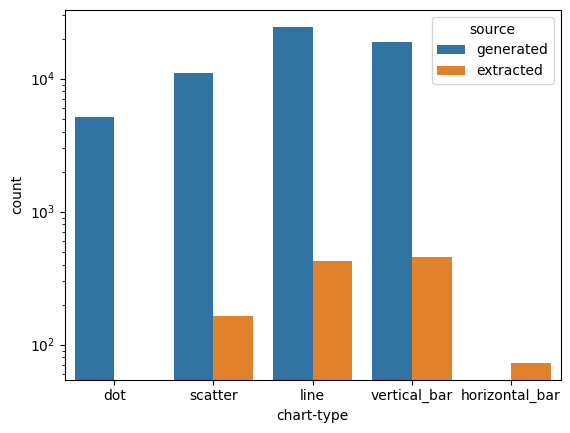

In [10]:
sns.countplot(x="chart-type", hue="source", data=df)
plt.yscale('log')
plt.show()

### Process columns

In [11]:
df['plot_x0'] = df['plot-bb'].apply(lambda x: x['x0'])
df['plot_y0'] = df['plot-bb'].apply(lambda x: x['y0'])
df['plot_h'] = df['plot-bb'].apply(lambda x: x['height'])
df['plot_w'] = df['plot-bb'].apply(lambda x: x['width'])

In [12]:
df['x_axis'] = df['axes'].apply(lambda x: x['x-axis'])
df['y_axis'] = df['axes'].apply(lambda x: x['y-axis'])

df['x_ticks_type'] = df['x_axis'].apply(lambda x: x['tick-type'])
df['x_values_type'] = df['x_axis'].apply(lambda x: x['values-type'])
df['y_ticks_type'] = df['y_axis'].apply(lambda x: x['tick-type'])
df['y_values_type'] = df['y_axis'].apply(lambda x: x['values-type'])

df['x_ticks'] = df['x_axis'].apply(lambda x: x['ticks'])
df['y_ticks'] = df['y_axis'].apply(lambda x: x['ticks'])

In [13]:
df.head(2)

,id,source,chart-type,plot-bb,text,axes,data-series,visual-elements,plot_x0,plot_y0,plot_h,plot_w,x_axis,y_axis,x_ticks_type,x_values_type,y_ticks_type,y_values_type,x_ticks,y_ticks
0,8941f843bb04,generated,dot,"{'height': 210, 'width': 413, 'x0': 77, 'y0': 34}","[{'id': 0, 'polygon': {'x0': 100, 'x1': 381, 'x2': 381, 'x3': 100, 'y0': 7, 'y1': 7, 'y2': 21, '...","{'x-axis': {'ticks': [{'id': 14, 'tick_pt': {'x': 111, 'y': 244}}, {'id': 15, 'tick_pt': {'x': 1...","[{'x': '1-10', 'y': 4}, {'x': '11-20', 'y': 9}, {'x': '21-30', 'y': 3}, {'x': '31-40', 'y': 6}, ...","{'bars': [], 'boxplots': [], 'dot points': [[{'x': 111.16666666666667, 'y': 231.69999999999996},...",77,34,210,413,"{'ticks': [{'id': 14, 'tick_pt': {'x': 111, 'y': 244}}, {'id': 15, 'tick_pt': {'x': 181, 'y': 24...","{'ticks': [{'id': 3, 'tick_pt': {'x': 77, 'y': 34}}, {'id': 4, 'tick_pt': {'x': 77, 'y': 55}}, {...",markers,categorical,markers,numerical,"[{'id': 14, 'tick_pt': {'x': 111, 'y': 244}}, {'id': 15, 'tick_pt': {'x': 181, 'y': 244}}, {'id'...","[{'id': 3, 'tick_pt': {'x': 77, 'y': 34}}, {'id': 4, 'tick_pt': {'x': 77, 'y': 55}}, {'id': 5, '..."
1,7dbdb91fa4a7,generated,scatter,"{'height': 198, 'width': 387, 'x0': 53, 'y0': 49}","[{'id': 0, 'polygon': {'x0': 49, 'x1': 415, 'x2': 415, 'x3': 49, 'y0': 5, 'y1': 5, 'y2': 35, 'y3...","{'x-axis': {'ticks': [{'id': 13, 'tick_pt': {'x': 53, 'y': 247}}, {'id': 14, 'tick_pt': {'x': 10...","[{'x': 1989.8843519834604, 'y': 137.384032977202}, {'x': 1991.9345738036784, 'y': 137.4446033481...","{'bars': [], 'boxplots': [], 'dot points': [], 'lines': [], 'scatter points': [[{'x': 106.666666...",53,49,198,387,"{'ticks': [{'id': 13, 'tick_pt': {'x': 53, 'y': 247}}, {'id': 14, 'tick_pt': {'x': 108, 'y': 247...","{'ticks': [{'id': 3, 'tick_pt': {'x': 53, 'y': 49}}, {'id': 4, 'tick_pt': {'x': 53, 'y': 71}}, {...",markers,numerical,markers,numerical,"[{'id': 13, 'tick_pt': {'x': 53, 'y': 247}}, {'id': 14, 'tick_pt': {'x': 108, 'y': 247}}, {'id':...","[{'id': 3, 'tick_pt': {'x': 53, 'y': 49}}, {'id': 4, 'tick_pt': {'x': 53, 'y': 71}}, {'id': 5, '..."


### Visual elements

In [14]:
df['visual-elements'][0]

{'bars': [],
 'boxplots': [],
 'dot points': [[{'x': 111.16666666666667, 'y': 231.69999999999996},
   {'x': 111.16666666666667, 'y': 211.19999999999996},
   {'x': 111.16666666666667, 'y': 190.19999999999996},
   {'x': 111.16666666666667, 'y': 170.69999999999996},
   {'x': 179.66666666666669, 'y': 232.69999999999996},
   {'x': 179.66666666666669, 'y': 210.69999999999996},
   {'x': 180.16666666666669, 'y': 189.69999999999996},
   {'x': 180.66666666666669, 'y': 169.69999999999996},
   {'x': 180.66666666666669, 'y': 148.19999999999996},
   {'x': 180.16666666666669, 'y': 127.69999999999996},
   {'x': 179.66666666666669, 'y': 107.19999999999996},
   {'x': 180.16666666666669, 'y': 87.69999999999996},
   {'x': 180.66666666666669, 'y': 65.69999999999996},
   {'x': 249.66666666666669, 'y': 232.19999999999996},
   {'x': 249.16666666666669, 'y': 210.69999999999996},
   {'x': 249.16666666666669, 'y': 191.19999999999996},
   {'x': 317.6666666666667, 'y': 231.69999999999996},
   {'x': 318.16666666666

In [15]:
df['elements_type'] = df['visual-elements'].apply(lambda x: [k for k in x if len(x[k])][0])

In [16]:
df['elements_type'][0:5]

0        dot points
1    scatter points
2             lines
3        dot points
4             lines
Name: elements_type, dtype: object

In [17]:
df['visual-elements'] = df.apply(lambda x: x['visual-elements'][x.elements_type], axis=1)

In [18]:
df['visual-elements'][0]

[[{'x': 111.16666666666667, 'y': 231.69999999999996},
  {'x': 111.16666666666667, 'y': 211.19999999999996},
  {'x': 111.16666666666667, 'y': 190.19999999999996},
  {'x': 111.16666666666667, 'y': 170.69999999999996},
  {'x': 179.66666666666669, 'y': 232.69999999999996},
  {'x': 179.66666666666669, 'y': 210.69999999999996},
  {'x': 180.16666666666669, 'y': 189.69999999999996},
  {'x': 180.66666666666669, 'y': 169.69999999999996},
  {'x': 180.66666666666669, 'y': 148.19999999999996},
  {'x': 180.16666666666669, 'y': 127.69999999999996},
  {'x': 179.66666666666669, 'y': 107.19999999999996},
  {'x': 180.16666666666669, 'y': 87.69999999999996},
  {'x': 180.66666666666669, 'y': 65.69999999999996},
  {'x': 249.66666666666669, 'y': 232.19999999999996},
  {'x': 249.16666666666669, 'y': 210.69999999999996},
  {'x': 249.16666666666669, 'y': 191.19999999999996},
  {'x': 317.6666666666667, 'y': 231.69999999999996},
  {'x': 318.1666666666667, 'y': 211.19999999999996},
  {'x': 318.1666666666667, 'y': 

In [19]:
# df['visual-elements'] = df['visual-elements'].apply(lambda x: [k for k in x if len(k)])
df['visual-elements'] = df['visual-elements'].apply(lambda x: x[0] if ((len(x) == 1) and isinstance(x[0], list)) else x)

ANOMALIES = [
    # DUPLICATED LINES
    'ae686738e744', 'c76f6d0d5239', '760c3fa4e3d9', 'c0c1f4046222', '3e568d136b85', '913447978a74', '2ff071a45cce', 'a9a07d74ee31',
    # MISSING ANNOTS
]

df['visual-elements'] = df['visual-elements'].apply(lambda x: x[0] if isinstance(x[0], list) else x)

In [20]:
df['visual-elements'][0]

[{'x': 111.16666666666667, 'y': 231.69999999999996},
 {'x': 111.16666666666667, 'y': 211.19999999999996},
 {'x': 111.16666666666667, 'y': 190.19999999999996},
 {'x': 111.16666666666667, 'y': 170.69999999999996},
 {'x': 179.66666666666669, 'y': 232.69999999999996},
 {'x': 179.66666666666669, 'y': 210.69999999999996},
 {'x': 180.16666666666669, 'y': 189.69999999999996},
 {'x': 180.66666666666669, 'y': 169.69999999999996},
 {'x': 180.66666666666669, 'y': 148.19999999999996},
 {'x': 180.16666666666669, 'y': 127.69999999999996},
 {'x': 179.66666666666669, 'y': 107.19999999999996},
 {'x': 180.16666666666669, 'y': 87.69999999999996},
 {'x': 180.66666666666669, 'y': 65.69999999999996},
 {'x': 249.66666666666669, 'y': 232.19999999999996},
 {'x': 249.16666666666669, 'y': 210.69999999999996},
 {'x': 249.16666666666669, 'y': 191.19999999999996},
 {'x': 317.6666666666667, 'y': 231.69999999999996},
 {'x': 318.1666666666667, 'y': 211.19999999999996},
 {'x': 318.1666666666667, 'y': 189.69999999999996}

In [21]:
df_elt = df[['id', 'visual-elements']].explode('visual-elements').reset_index(drop=True)

df_elt = df_elt.rename(columns={"id": "chart_id"})
df_elt.head(3)

,chart_id,visual-elements
0,8941f843bb04,"{'x': 111.16666666666667, 'y': 231.69999999999996}"
1,8941f843bb04,"{'x': 111.16666666666667, 'y': 211.19999999999996}"
2,8941f843bb04,"{'x': 111.16666666666667, 'y': 190.19999999999996}"


In [22]:
# dict.get(key[, default])
df_elt['x'] = df_elt['visual-elements'].apply(lambda x: x.get('x', np.nan))
df_elt['y'] = df_elt['visual-elements'].apply(lambda x: x.get('y', np.nan))

df_elt['x0'] = df_elt['visual-elements'].apply(lambda x: x.get('x0', np.nan))
df_elt['y0'] = df_elt['visual-elements'].apply(lambda x: x.get('y0', np.nan))
df_elt['h'] = df_elt['visual-elements'].apply(lambda x: x.get('height', np.nan))
df_elt['w'] = df_elt['visual-elements'].apply(lambda x: x.get('width', np.nan))
df_elt.head(3)

,chart_id,visual-elements,x,y,x0,y0,h,w
0,8941f843bb04,"{'x': 111.16666666666667, 'y': 231.69999999999996}",111.166667,231.7,NaN,NaN,NaN,NaN
1,8941f843bb04,"{'x': 111.16666666666667, 'y': 211.19999999999996}",111.166667,211.2,NaN,NaN,NaN,NaN
2,8941f843bb04,"{'x': 111.16666666666667, 'y': 190.19999999999996}",111.166667,190.2,NaN,NaN,NaN,NaN


In [23]:
df_elt.drop('visual-elements', axis=1, inplace=True)

In [24]:
df_elt.head(2)

,chart_id,x,y,x0,y0,h,w
0,8941f843bb04,111.166667,231.7,NaN,NaN,NaN,NaN
1,8941f843bb04,111.166667,211.2,NaN,NaN,NaN,NaN


### Texts & ticks

In [25]:
df['text'][0]

[{'id': 0,
  'polygon': {'x0': 100,
   'x1': 381,
   'x2': 381,
   'x3': 100,
   'y0': 7,
   'y1': 7,
   'y2': 21,
   'y3': 21},
  'text': 'Attendence of Students in Columbus State University',
  'role': 'chart_title'},
 {'id': 1,
  'polygon': {'x0': 9,
   'x1': 54,
   'x2': 54,
   'x3': 9,
   'y0': 124,
   'y1': 124,
   'y2': 167,
   'y3': 167},
  'text': 'No.of Students (*1000)',
  'role': 'axis_title'},
 {'id': 2,
  'polygon': {'x0': 239,
   'x1': 328,
   'x2': 328,
   'x3': 239,
   'y0': 268,
   'y1': 268,
   'y2': 279,
   'y3': 279},
  'text': 'Week of the Year',
  'role': 'axis_title'},
 {'id': 3,
  'polygon': {'x0': 55,
   'x1': 68,
   'x2': 68,
   'x3': 55,
   'y0': 29,
   'y1': 29,
   'y2': 39,
   'y3': 39},
  'text': '10',
  'role': 'tick_label'},
 {'id': 4,
  'polygon': {'x0': 60,
   'x1': 68,
   'x2': 68,
   'x3': 60,
   'y0': 49,
   'y1': 49,
   'y2': 59,
   'y3': 59},
  'text': '9',
  'role': 'tick_label'},
 {'id': 5,
  'polygon': {'x0': 60,
   'x1': 68,
   'x2': 68,
   '

In [26]:
df_text = df[['id', 'text']].explode('text').reset_index(drop=True)

df_text = df_text.rename(columns={"id": "chart_id"})

df_text['id'] = df_text['text'].apply(lambda x: x['id'])
df_text["polygon"] = df_text['text'].apply(lambda x: x['polygon'])
df_text['text'] = df_text['text'].apply(lambda x: x['text'])

df_text["polygon"] = df_text["polygon"].apply(lambda x: list(x.values()))

# df_text['polygon'].head(3) =>
# 0          [100, 381, 381, 100, 7, 7, 21, 21]
# 1          [9, 54, 54, 9, 124, 124, 167, 167]
# 2    [239, 328, 328, 239, 268, 268, 279, 279]
# Name: polygon, dtype: object

# df_text.polygon.tolist() => [[100, 381, 381, 100, 7, 7, 21, 21], [9, 54, 54, 9, 124, 124, 167, 167], ...]

# pd.DataFrame(df_text.polygon.tolist(), index=df_text.index).head(3) =>
#      0    1    2    3    4    5    6    7
# 0  100  381  381  100    7    7   21   21
# 1    9   54   54    9  124  124  167  167
# 2  239  328  328  239  268  268  279  279

df_text[['x0','x1', 'x2', 'x3', 'y0', 'y1', 'y2', 'y3']] = pd.DataFrame(df_text.polygon.tolist(), index=df_text.index)
df_text.drop("polygon", axis=1, inplace=True)

In [27]:
# df_text[['x0','x1', 'x2', 'x3']].values =>
# array([[100, 381, 381, 100],
#        [239, 328, 328, 239],
#        ...,
#        [372, 399, 399, 372],
#        [433, 459, 459, 433]])

# numpy.ndarray.min(axis=None,) => return the minimum along a given axis. 

# df_text[['x0','x1', 'x2', 'x3']].values.min(1) => 
# array([100,   9, 239, ..., 372, 403, 433])


df_text['x_min'] = df_text[['x0','x1', 'x2', 'x3']].values.min(1)
df_text['x_max'] = df_text[['x0','x1', 'x2', 'x3']].values.max(1)
df_text['y_min'] = df_text[['y0','y1', 'y2', 'y3']].values.min(1)
df_text['y_max'] = df_text[['y0','y1', 'y2', 'y3']].values.max(1)

In [28]:
df_text.head(3)

,chart_id,text,id,x0,x1,x2,x3,y0,y1,y2,y3,x_min,x_max,y_min,y_max
0,8941f843bb04,Attendence of Students in Columbus State University,0,100,381,381,100,7,7,21,21,100,381,7,21
1,8941f843bb04,No.of Students (*1000),1,9,54,54,9,124,124,167,167,9,54,124,167
2,8941f843bb04,Week of the Year,2,239,328,328,239,268,268,279,279,239,328,268,279


In [29]:
df['x_ticks'][0]

[{'id': 14, 'tick_pt': {'x': 111, 'y': 244}},
 {'id': 15, 'tick_pt': {'x': 181, 'y': 244}},
 {'id': 16, 'tick_pt': {'x': 250, 'y': 244}},
 {'id': 17, 'tick_pt': {'x': 318, 'y': 244}},
 {'id': 18, 'tick_pt': {'x': 386, 'y': 244}},
 {'id': 19, 'tick_pt': {'x': 456, 'y': 244}}]

In [30]:
df_x_ticks = df[['id', 'x_ticks']].explode('x_ticks').rename(columns={"x_ticks": "ticks"})
df_x_ticks['axis'] = "x"

df_y_ticks = df[['id', 'y_ticks']].explode('y_ticks').rename(columns={"y_ticks": "ticks"})
df_y_ticks['axis'] = "y"

df_ticks = pd.concat([df_x_ticks, df_y_ticks], ignore_index=True)

df_ticks = df_ticks.rename(columns={"id": "chart_id"})

df_ticks['id'] = df_ticks['ticks'].apply(lambda x: x['id'] if isinstance(x, dict) else np.nan)
df_ticks['x'] = df_ticks['ticks'].apply(lambda x: x['tick_pt']['x'] if isinstance(x, dict) else np.nan)
df_ticks['y'] = df_ticks['ticks'].apply(lambda x: x['tick_pt']['y'] if isinstance(x, dict) else np.nan)

df_ticks = df_ticks.dropna(axis=0)
df_ticks['id'] = df_ticks['id'].astype(int)
df_ticks = df_ticks.drop("ticks", axis=1)

In [31]:
df_ticks.head(3)

,chart_id,axis,id,x,y
0,8941f843bb04,x,14,111.0,244.0
1,8941f843bb04,x,15,181.0,244.0
2,8941f843bb04,x,16,250.0,244.0


In [32]:
# for df_ticks rows which do not match df_text on ['chart_id', "id"], their ['axis','x','y'] values become NaN. 
df_text = df_text.merge(df_ticks, on=['chart_id', "id"], how="left")

In [33]:
df_text.head(2)

,chart_id,text,id,x0,x1,x2,x3,y0,y1,y2,y3,x_min,x_max,y_min,y_max,axis,x,y
0,8941f843bb04,Attendence of Students in Columbus State University,0,100,381,381,100,7,7,21,21,100,381,7,21,NaN,NaN,NaN
1,8941f843bb04,No.of Students (*1000),1,9,54,54,9,124,124,167,167,9,54,124,167,NaN,NaN,NaN


### Target

In [34]:
df['data-series'][0]

[{'x': '1-10', 'y': 4},
 {'x': '11-20', 'y': 9},
 {'x': '21-30', 'y': 3},
 {'x': '31-40', 'y': 6},
 {'x': '41-50', 'y': 7},
 {'x': '51-52', 'y': 4}]

In [35]:
df_target = df[['id', 'data-series']].explode('data-series').reset_index(drop=True)

In [36]:
df_target['x'] = df_target['data-series'].apply(lambda x: x['x'])
df_target['y'] = df_target['data-series'].apply(lambda x: x['y'])

In [37]:
df_target.drop('data-series', axis=1, inplace=True)

In [38]:
df_target.head()

,id,x,y
0,8941f843bb04,1-10,4
1,8941f843bb04,11-20,9
2,8941f843bb04,21-30,3
3,8941f843bb04,31-40,6
4,8941f843bb04,41-50,7


### Finalize

In [39]:
df.head(1)

,id,source,chart-type,plot-bb,text,axes,data-series,visual-elements,plot_x0,plot_y0,...,plot_w,x_axis,y_axis,x_ticks_type,x_values_type,y_ticks_type,y_values_type,x_ticks,y_ticks,elements_type
0,8941f843bb04,generated,dot,"{'height': 210, 'width': 413, 'x0': 77, 'y0': 34}","[{'id': 0, 'polygon': {'x0': 100, 'x1': 381, 'x2': 381, 'x3': 100, 'y0': 7, 'y1': 7, 'y2': 21, '...","{'x-axis': {'ticks': [{'id': 14, 'tick_pt': {'x': 111, 'y': 244}}, {'id': 15, 'tick_pt': {'x': 1...","[{'x': '1-10', 'y': 4}, {'x': '11-20', 'y': 9}, {'x': '21-30', 'y': 3}, {'x': '31-40', 'y': 6}, ...","[{'x': 111.16666666666667, 'y': 231.69999999999996}, {'x': 111.16666666666667, 'y': 211.19999999...",77,34,...,413,"{'ticks': [{'id': 14, 'tick_pt': {'x': 111, 'y': 244}}, {'id': 15, 'tick_pt': {'x': 181, 'y': 24...","{'ticks': [{'id': 3, 'tick_pt': {'x': 77, 'y': 34}}, {'id': 4, 'tick_pt': {'x': 77, 'y': 55}}, {...",markers,categorical,markers,numerical,"[{'id': 14, 'tick_pt': {'x': 111, 'y': 244}}, {'id': 15, 'tick_pt': {'x': 181, 'y': 244}}, {'id'...","[{'id': 3, 'tick_pt': {'x': 77, 'y': 34}}, {'id': 4, 'tick_pt': {'x': 77, 'y': 55}}, {'id': 5, '...",dot points


In [40]:
df = df.drop(["plot-bb", 'text', "axes", "x_axis", "y_axis", "x_ticks", "y_ticks", "data-series", "visual-elements"], axis=1)

In [41]:
df.to_csv('./input/df_train.csv', index=False)
df_text.to_csv('./input/texts.csv', index=False)
df_target.to_csv('./input/y_train.csv', index=False)
df_elt.to_csv('./input/elements.csv', index=False)

Done ! 